In [113]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import statistics


In [114]:
#read data from csv-file than convert it to a matrix
file_as_matrix = list(csv.reader(open("pima-indians-diabetes.csv","r")))

#convert string data to float 
data_toDigits=[] 
for row in file_as_matrix: 
   data_toDigits.append( [float(val)  for val in row])

data_points=[data_toDigits[i][0:-1]for i in range(len(data_toDigits)) ] 
labels=[data_toDigits[i][-1]for i in range(len(data_toDigits)) ] 
features=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
     "Insulin", "BMI" ,"DiabetesPedigreeFunction", "Age"]


The first approach: traditional data splitting

acurracy score: 0.7532467532467533% 


array([0.        , 0.001396  , 0.001396  , 0.0014477 , 0.0014658 ,
       0.0014658 , 0.00152291, 0.00153818, 0.00154723, 0.00159793,
       0.00161553, 0.00162866, 0.00202179, 0.00214298, 0.00217155,
       0.00217155, 0.00217155, 0.00217155, 0.00229642, 0.00239858,
       0.002443  , 0.002443  , 0.00260586, 0.00260586, 0.00281019,
       0.00296121, 0.00296121, 0.00296943, 0.00297942, 0.00304435,
       0.0030775 , 0.00311111, 0.00316153, 0.00325213, 0.00329483,
       0.00361726, 0.0039119 , 0.00424246, 0.00424725, 0.00433117,
       0.00450086, 0.00528274, 0.0069499 , 0.00742701, 0.00797378,
       0.00852251, 0.00927051, 0.01184388, 0.01417035, 0.02311097,
       0.02459664, 0.08048715])

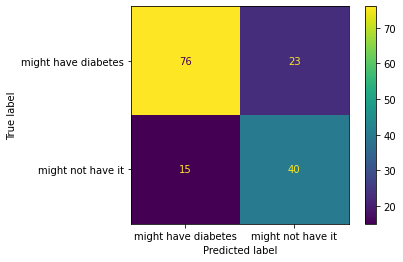

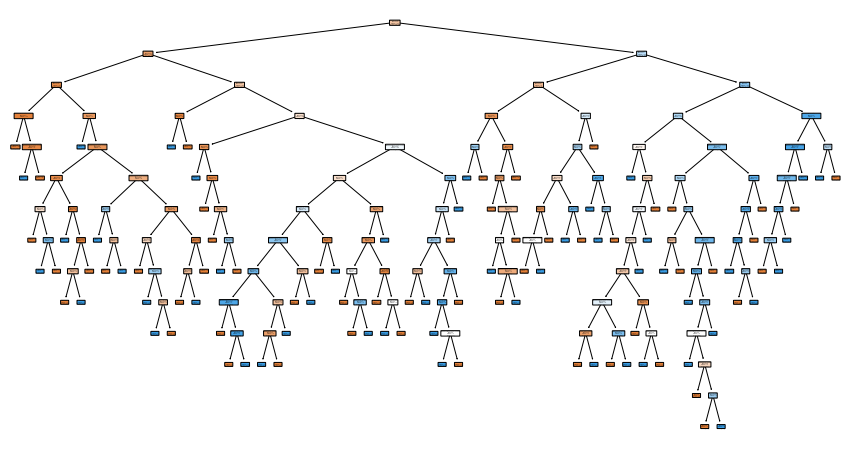

In [115]:
#spliting the data
x_train, x_test, y_train, y_test=train_test_split(data_points,labels, test_size=0.20, random_state=42)
x_train2, x_val, y_train2, y_val=train_test_split(x_train,y_train, test_size=0.20,random_state=42) 

#intializing and fiting the model
dt_clf = tree.DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)


#testing and pruning
predicted=dt_clf.predict(x_test)
p= dt_clf.cost_complexity_pruning_path(x_train,y_train)
#alphas=p.ccp_alphas #extract diffrent values o alpha

score=accuracy_score(y_test,predicted)  #0.74
plot_confusion_matrix(dt_clf, x_test,y_test, display_labels=["might have diabetes","might not have it"])

#75+21 of people who might have diabetes in the coming 5 years, 75(77.22%) were crrectly classified.
#40+15 of people who might not have diabetes in the coming 5 years, 40(72.73%) were crrectly classified.
print("acurracy score: {}% ".format(score))

#tree plotting
plt.figure(figsize=(15,8)) 
tree.plot_tree(dt_clf,filled=True, rounded=True, feature_names=features )
alphas


The second appraoch: post pruning (ccp-alphas)

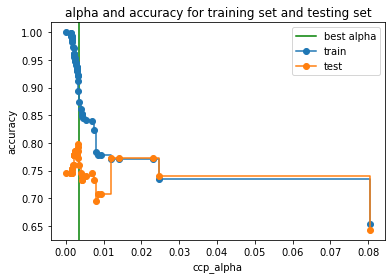

In [116]:

#first we will make a comparision between accurcy of train and test sets given different alphas
#finding the best alpha for the given test and train sets

alphas, impurities = p.ccp_alphas, p.impurities
classifiers = []
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(x_train, y_train)
    classifiers.append(clf)

train_scores = [clf.score(x_train, y_train) for clf in classifiers]
test_scores = [clf.score(x_test, y_test) for clf in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("alpha and accuracy for training set and testing set")
plt.axvline(x=0.0036, color='g', linestyle='-', label="best alpha")
ax.plot(alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")

ax.legend()
plt.show()

acurracy score: 0.7727272727272727% 


[Text(430.44791666666663, 416.76, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(156.1625, 380.52, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(64.06666666666666, 344.28, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(32.03333333333333, 308.03999999999996, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(96.1, 308.03999999999996, 'BloodPressure <= 37.0\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(64.06666666666666, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(128.13333333333333, 271.79999999999995, 'gini = 0.251\nsamples = 95\nvalue = [81, 14]'),
 Text(248.25833333333333, 344.28, 'BMI <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(216.225, 308.03999999999996, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(280.29166666666663, 308.03999999999996, 'Glucose <= 94.5\ngini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(192.2, 271.79999999999995, 

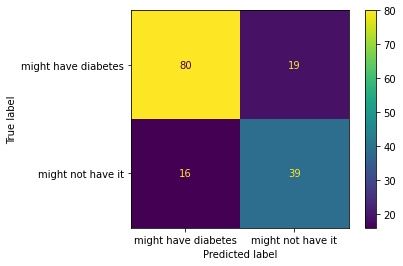

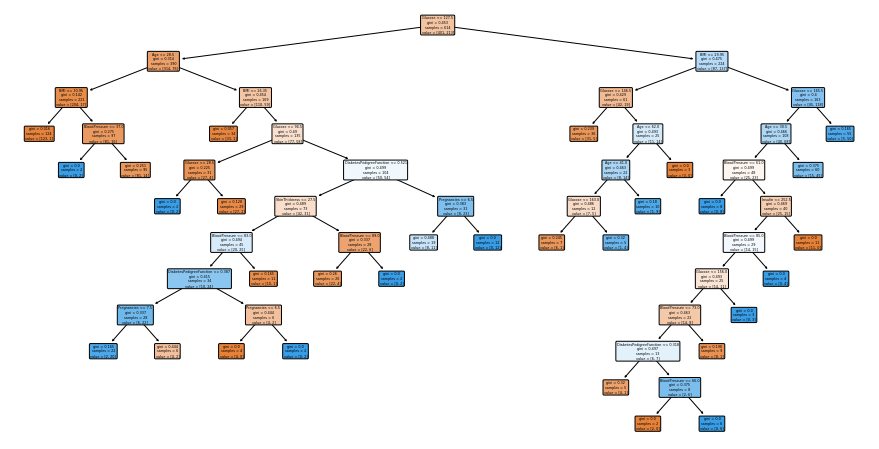

In [117]:
#the best alpha is 0.0036
dt_clf2=tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.0036)
dt_clf2 = dt_clf2.fit(x_train,y_train)

pred=dt_clf2.predict(x_test)
ac_score=accuracy_score(y_test,pred)  #0.74


plot_confusion_matrix(dt_clf2, x_test,y_test, display_labels=["might have diabetes","might not have it"])
#87+12 of people who might have diabetes in the coming 5 years, 87( %) were crrectly classified.
#32+23 of people who might not have diabetes in the coming 5 years, 32( 58.18%) were crrectly classified.
print("acurracy score: {}% ".format(ac_score))
plt.figure(figsize=(15.5,8)) # 14 layers
tree.plot_tree(dt_clf2,filled=True, rounded=True, feature_names=features )



The third approach: cross validation with post pruning

acurracy score: 0.7337662337662337% 


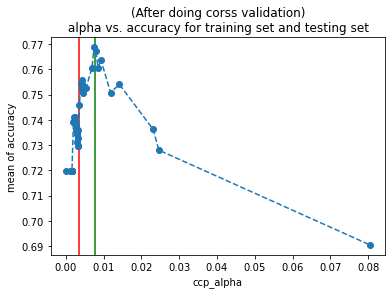

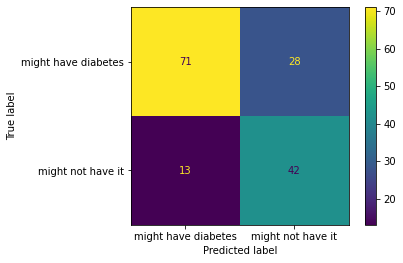

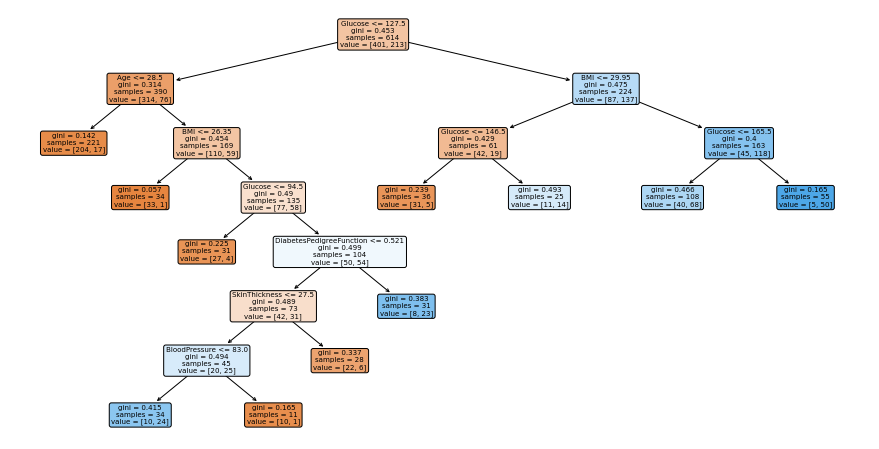

In [118]:

scores = []
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    crossVal_scores=cross_val_score(clf, x_train,y_train, cv=5 )
    #print(crossVal_scores)
    scores.append( statistics.mean(crossVal_scores) )
#alpha is sensitive to different training and testing data set
#print("mean scores:", scores)

fig, ax = plt.subplots()

ax.set_xlabel("ccp_alpha")
ax.set_ylabel("mean of accuracy")
ax.set_title("(After doing corss validation)\n alpha vs. accuracy for training set and testing set ")
ax.axvline(x=0.0036, color='r', linestyle='-', label="best alpha uten validation")
ax.axvline(x=0.00775, color='g', linestyle='-', label="best alpha after validation")
ax.plot(alphas, scores, linestyle='--', marker='o',label="train")


cv_clf=clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.00775)
cv_clf = validated_clf.fit(x_train,y_train)

predicted=validated_clf.predict(x_test)

plot_confusion_matrix(validated_clf, x_test,y_test, display_labels=["might have diabetes","might not have it"])

plt.figure(figsize=(15.5,8)) # 14 layers
tree.plot_tree(validated_clf,filled=True, rounded=True, feature_names=features )

val_score=accuracy_score(y_test,predicted)
print("acurracy score: {}% ".format(val_score))



The fourth and best approach: stratified k-fold cross validation  


The optimized classifer:
1) minmum accuracy score: 0.6493506493506493 %
 fold index :2 
  alhpa: 0
2) max accuracy score: 0.8300653594771242  %
 fold index :3 
 alhpa: 29
3) average accuracy score: 0.7259970421735128 % 
  Obs.It has no alph nor fold because it is in-between      two accracy scores..
acurracy score: 0.8300653594771242%  


[Text(507.12564432989694, 419.3485714285714, 'Glucose <= 154.5\ngini = 0.455\nsamples = 615\nvalue = [400, 215]'),
 Text(280.1265463917526, 388.2857142857143, 'Age <= 28.5\ngini = 0.389\nsamples = 518\nvalue = [381, 137]'),
 Text(178.3298969072165, 357.22285714285715, 'Glucose <= 127.5\ngini = 0.245\nsamples = 273\nvalue = [234, 39]'),
 Text(118.88659793814433, 326.15999999999997, 'BMI <= 45.4\ngini = 0.172\nsamples = 221\nvalue = [200, 21]'),
 Text(95.10927835051547, 295.09714285714284, 'BMI <= 30.9\ngini = 0.152\nsamples = 217\nvalue = [199, 18]'),
 Text(47.55463917525773, 264.0342857142857, 'Pregnancies <= 7.5\ngini = 0.033\nsamples = 121\nvalue = [119, 2]'),
 Text(23.777319587628867, 232.97142857142856, 'gini = 0.017\nsamples = 120\nvalue = [119, 1]'),
 Text(71.3319587628866, 232.97142857142856, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(142.6639175257732, 264.0342857142857, 'DiabetesPedigreeFunction <= 0.956\ngini = 0.278\nsamples = 96\nvalue = [80, 16]'),
 Text(118.8865979

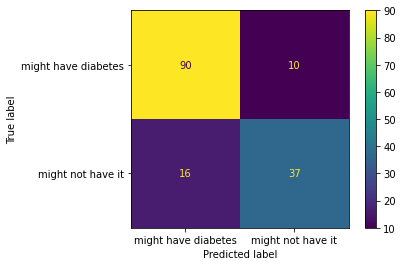

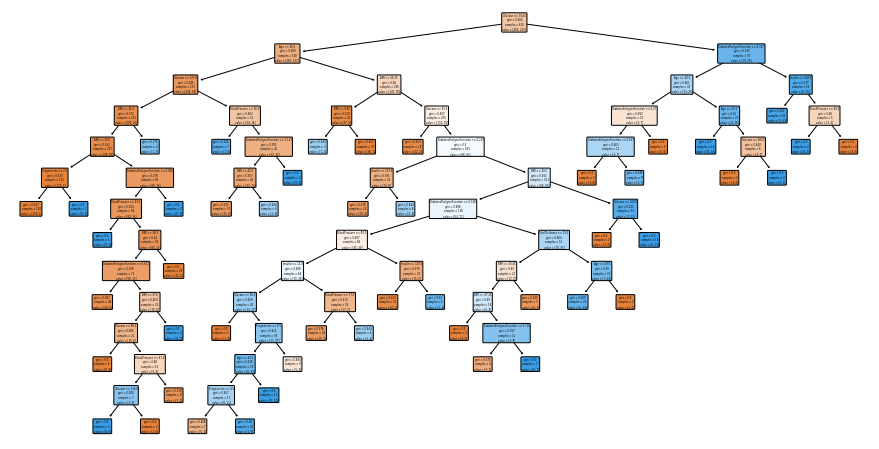

In [178]:
from sklearn.model_selection import StratifiedKFold

kfolds = StratifiedKFold(n_splits=5)
#as long we are using k-fold, we are 
#In this block  we are going to  find the best alpha  and the best spiltting of data in the same time
# 5 folds  X   52 alhpas = 260 acuuracy scores

#every element in this list reprsents a fold which is divided into four lists: x_train, y_train, x_test,y_tes
data_as_folds=[] 
for train_index, test_index in kfolds.split(data_points,labels):
    x_train=[data_points[i] for i in  train_index]
    y_train=[labels[i] for i in  train_index]
    x_test=[data_points[i] for i in  test_index]
    y_test=[labels[i] for i in  test_index]
    
    data_as_folds.append([x_train, y_train,x_test, y_test])

all_scores = []

#keep truck on which (indexes of )alpha and fold a score belongs to/accociated with
related_alpha_fold=[]


for i in range(len(data_as_folds)):  
    for j in range(len(alphas)):   
        clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=alphas[j])
        clf=clf.fit(data_as_folds[i][0],data_as_folds[i][1])
        predicted=clf.predict(data_as_folds[i][2])
        crossVal_scores=accuracy_score(predicted,data_as_folds[i][3] )
        all_scores.append(crossVal_scores)
        related_alpha_fold.append([i,j])

mn=min(all_scores)
mn_i=all_scores.index(mn)

mx=max(all_scores)
mx_i=all_scores.index(mx)

mean=statistics.mean(all_scores)

print("The optimized classifer:")
print("1) minmum accuracy score: {} %\n fold index :{} \n  alhpa: {}".format(mn, related_alpha_fold[mn_i][0], 
                                                                      related_alpha_fold[mn_i][1]))

print("2) max accuracy score: {}  %\n fold index :{} \n alhpa: {}".format(mx, related_alpha_fold[mx_i][0], 
                                                                      related_alpha_fold[mx_i][1]))
print("3) average accuracy score: {} % \n  Obs.It has no alph nor fold because it is in-between\
      two accracy scores..".format(mean))


x_t=data_as_folds[related_alpha_fold[mx_i][0]][0]
y_t=data_as_folds[related_alpha_fold[mx_i][0]][1]
x_tes=data_as_folds[related_alpha_fold[mx_i][0]][2]
y_tes=data_as_folds[related_alpha_fold[mx_i][0]][3]

best_alpha=alphas[related_alpha_fold[mx_i][1]]
optimized_clf = tree.DecisionTreeClassifier( random_state=42,ccp_alpha=best_alpha)
optimized_clf=optimized_clf.fit(x_t,y_t)
pre=optimized_clf.predict(x_tes)
plot_confusion_matrix(optimized_clf, x_tes,y_tes, display_labels=["might have diabetes","might not have it"])
op_score=accuracy_score(y_tes,pre)

#all_scores
print("Confusion matric of the best ")
plt.figure(figsize=(15.5,8)) # 14 layers
tree.plot_tree(optimized_clf,filled=True, rounded=True, feature_names=features )
